<a href="https://colab.research.google.com/github/lbarazza/DeepLearningVideoGames/blob/master/PublicSpeaking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

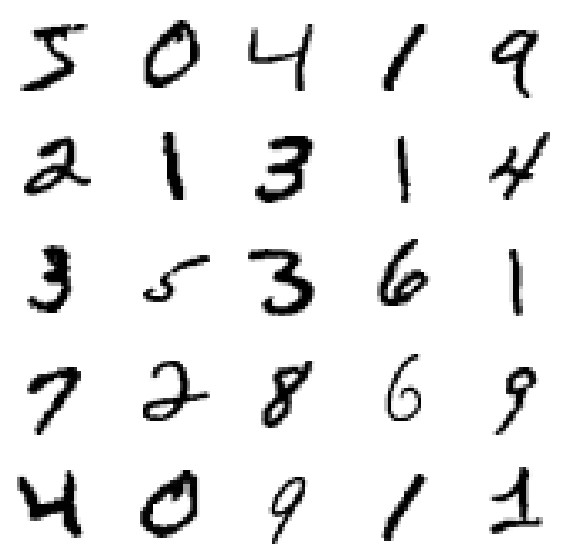

In [41]:
dataset = load_dataset()
show_dataset(dataset)

In [42]:
machine = new_neural_network()
train_neural_network(machine, dataset)
evaluate_neural_network(machine, dataset)

Epoch 1/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2155 - acc: 0.9369
Epoch 2/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0971 - acc: 0.9699
Epoch 3/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0680 - acc: 0.9784
Epoch 4/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0534 - acc: 0.9826
Epoch 5/5
10000/10000 [==============================] - 1s 75us/sample - loss: 0.0679 - acc: 0.9788


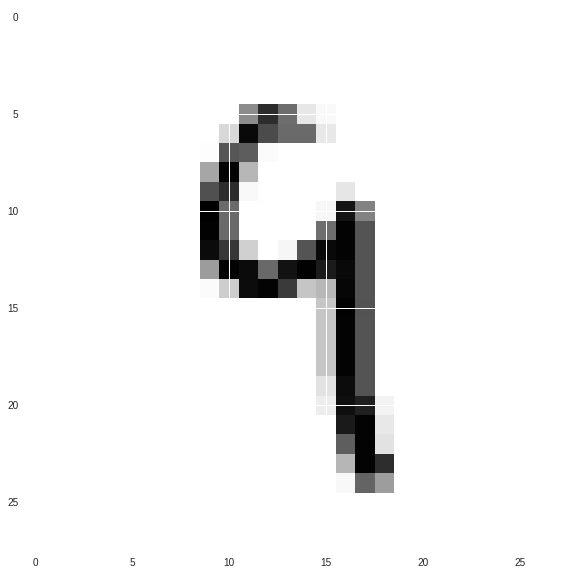

In [43]:
show_machine_results(dataset, machine)

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

def load_dataset():
  mnist = tf.keras.datasets.mnist

  (x_train, y_train),(x_test, y_test) = mnist.load_data()
  x_train, x_test = x_train / 255.0, x_test / 255.0
  
  return [x_train, y_train, x_test, y_test]

def new_neural_network():
  machine = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  machine.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return machine

def train_neural_network(machine, dataset):
  machine.fit(dataset[0], dataset[1], epochs=5)
  
def evaluate_neural_network(machine, dataset):
  machine.evaluate(dataset[2], dataset[3])
  
  
########################################################  
  
  
def show_dataset(dataset):
  plt.figure(figsize=(10,10))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dataset[0][i], cmap=plt.cm.binary)
    
plt.show()

def show_machine_results(dataset, machine):
  plt.figure(figsize=(10,10))
  plt.imshow(dataset[0][random.randint(0, len(dataset[0]))])